#### Preliminary analysis of updated maizsim runs
Previously 'opt', but found bug in climate file that messed up rainfall. <br/>
Updated runs named 'fixpd'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from palettable.colorbrewer.sequential import YlGnBu_8
from palettable.colorbrewer.sequential import YlGn_9

from ideotype.data_process import read_sims, read_data

In [147]:
# read in sims - fixpd
#dirct_sims = '/home/disk/eos8/ach315/upscale/sims/fixpd/'
#df_sims_fix, df_issues_fix = read_sims(dirct_sims)
#df_sims_fix.to_csv('/home/disk/eos8/ach315/upscale/data/sims_6163_fixpd.csv', index=False)

In [148]:
# read in data
yamlfile = '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_fixpd.yml'
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(yamlfile)

In [74]:
# read in sims - opt for year 1961 only
dirct_sims = '/home/disk/eos8/ach315/upscale/sims/opt/1961'
df_sims_opt, df_issues_opt = read_sims(dirct_sims)

#### 210326 notes
- Noticed that a lot more sims not reaching maturity, with quite a few more halting at earlier pheno stages

In [239]:
df_sims.groupby('note').count()

year   cvar   site   date   jday   time  leaves  mature_lvs  \
note                                                                         
"Emerged"       505    505    505    505    505    505     505         505   
"Germinated"    100    100    100    100    100    100     100         100   
"Matured"     12521  12521  12521  12521  12521  12521   12521       12521   
"Silked"        314    314    314    314    314    314     314         314   
"Tasseled"      187    187    187    187    187    187     187         187   
"Tasselinit"    264    264    264    264    264    264     264         264   
"grainFill"    2212   2212   2212   2212   2212   2212    2212        2212   

              drop_lvs     LA  ...  dm_shoot  dm_ear  dm_totleaf  dm_dropleaf  \
note                           ...                                              
"Emerged"          505    505  ...       505     505         505          505   
"Germinated"       100    100  ...       100     100         100          100   
"Matured"        12521  12521  ...     12521   12521       12521        12521   
"Silked"           314    314  ...       314     314         314          314   
"Tasseled"         187    187  ...       187     187         187          187   
"Tasselinit"       264    264  ...       264     264         264          264   
"grainFill"       2212   2212  ...      2212    2212        2212         2212   

              df_stem  df_root  roil_rt  mx_rootdept  available_water  \
note                                                                    
"Emerged"         505      505      505          505              505   
"Germinated"      100      100      100          100              100   
"Matured"       12521    12521    12521        12521            12521   
"Silked"          314      314      314          314              314   
"Tasseled"        187      187      187          187              187   
"Tasselinit"      264      264      264          264              264   
"grainFill"      2212     2212     2212         2212             2212   

              soluble_c  
note                     
"Emerged"           505  
"Germinated"        100  
"Matured"         12521  
"Silked"            314  
"Tasseled"          187  
"Tasselinit"        264  
"grainFill"        2212  

[7 rows x 52 columns]

In [320]:
df_sims_opt.groupby('note').count()

year  cvar  site  date  jday  time  leaves  mature_lvs  \
note                                                                   
"Germinated"     1     1     1     1     1     1       1           1   
"Matured"     7949  7949  7949  7949  7949  7949    7949        7949   
"Silked"        75    75    75    75    75    75      75          75   
"Tasseled"      57    57    57    57    57    57      57          57   
"Tasselinit"    34    34    34    34    34    34      34          34   
"grainFill"    584   584   584   584   584   584     584         584   

              drop_lvs    LA  ...  dm_shoot  dm_ear  dm_totleaf  dm_dropleaf  \
note                          ...                                              
"Germinated"         1     1  ...         1       1           1            1   
"Matured"         7949  7949  ...      7949    7949        7949         7949   
"Silked"            75    75  ...        75      75          75           75   
"Tasseled"          57    57  ...        57      57          57           57   
"Tasselinit"        34    34  ...        34      34          34           34   
"grainFill"        584   584  ...       584     584         584          584   

              df_stem  df_root  roil_rt  mx_rootdept  available_water  \
note                                                                    
"Germinated"        1        1        1            1                1   
"Matured"        7949     7949     7949         7949             7949   
"Silked"           75       75       75           75               75   
"Tasseled"         57       57       57           57               57   
"Tasselinit"       34       34       34           34               34   
"grainFill"       584      584      584          584              584   

              soluble_c  
note                     
"Germinated"          1  
"Matured"          7949  
"Silked"             75  
"Tasseled"           57  
"Tasselinit"         34  
"grainFill"         584  

[6 rows x 52 columns]

In [158]:
set(df_sims.note)

{'"Emerged"',
 '"Germinated"',
 '"Matured"',
 '"Silked"',
 '"Tasseled"',
 '"Tasselinit"',
 '"grainFill"'}

#### 210326 notes
- Noticed that after the erain fix, many more simualtions are taking much longer to run, sometimes running into bottlenecks in certain pheno stages. While the models eventually do finish running, not all of them make the 15 min cutoff I enfored in the job scripts, so while more of the later pheno stage stop points are due to running out of weather data, most of the earlier ones are because the sims got cut off before they got a chance to finish.
- I can't quite figure out why, other than it must have something to do with water, and how the weather file is read in and processed? This might have to be a question for Dennis.

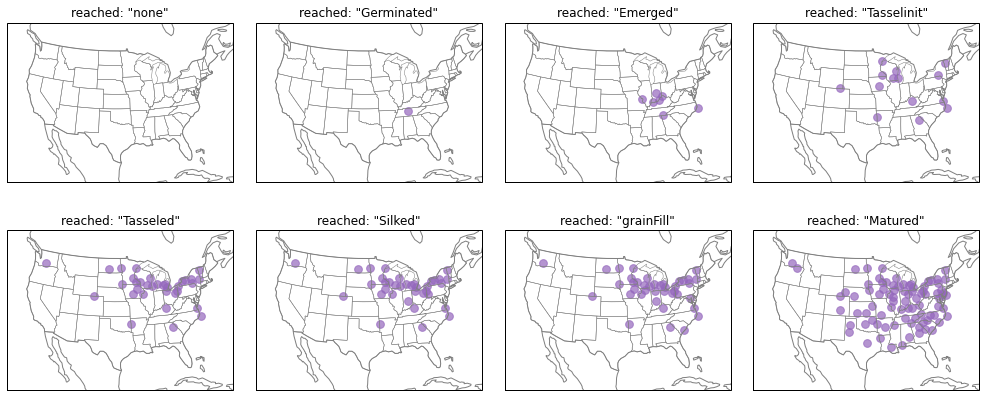

In [307]:
fig = plt.figure(figsize=(15,7))
stages = ['"none"', '"Germinated"', '"Emerged"', '"Tasselinit"', 
          '"Tasseled"', '"Silked"', '"grainFill"', '"Matured"']

for i in np.arange(1,9):
    ax = fig.add_subplot(2,4,i, projection=ccrs.AlbersEqualArea(
                         central_latitude=39.5, central_longitude=-98.35))
    ax.set_extent([-123, -72, 19, 53])
    test_sites = set(df_sims[df_sims.note == stages[i-1]].site)
    test_sites_loc = df_sites[df_sites.site.isin(test_sites)]
    ax.scatter(test_sites_loc.lon, test_sites_loc.lat, transform=ccrs.PlateCarree(), 
                s=60, c='tab:purple', alpha=0.7)
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set_title('reached: ' + stages[i-1])
fig.subplots_adjust(left=0.05, bottom=0, right=0.95, top=1, wspace=0.1, hspace=-0.3)

/home/disk/eos8/ach315/anaconda3/envs/ideotype/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


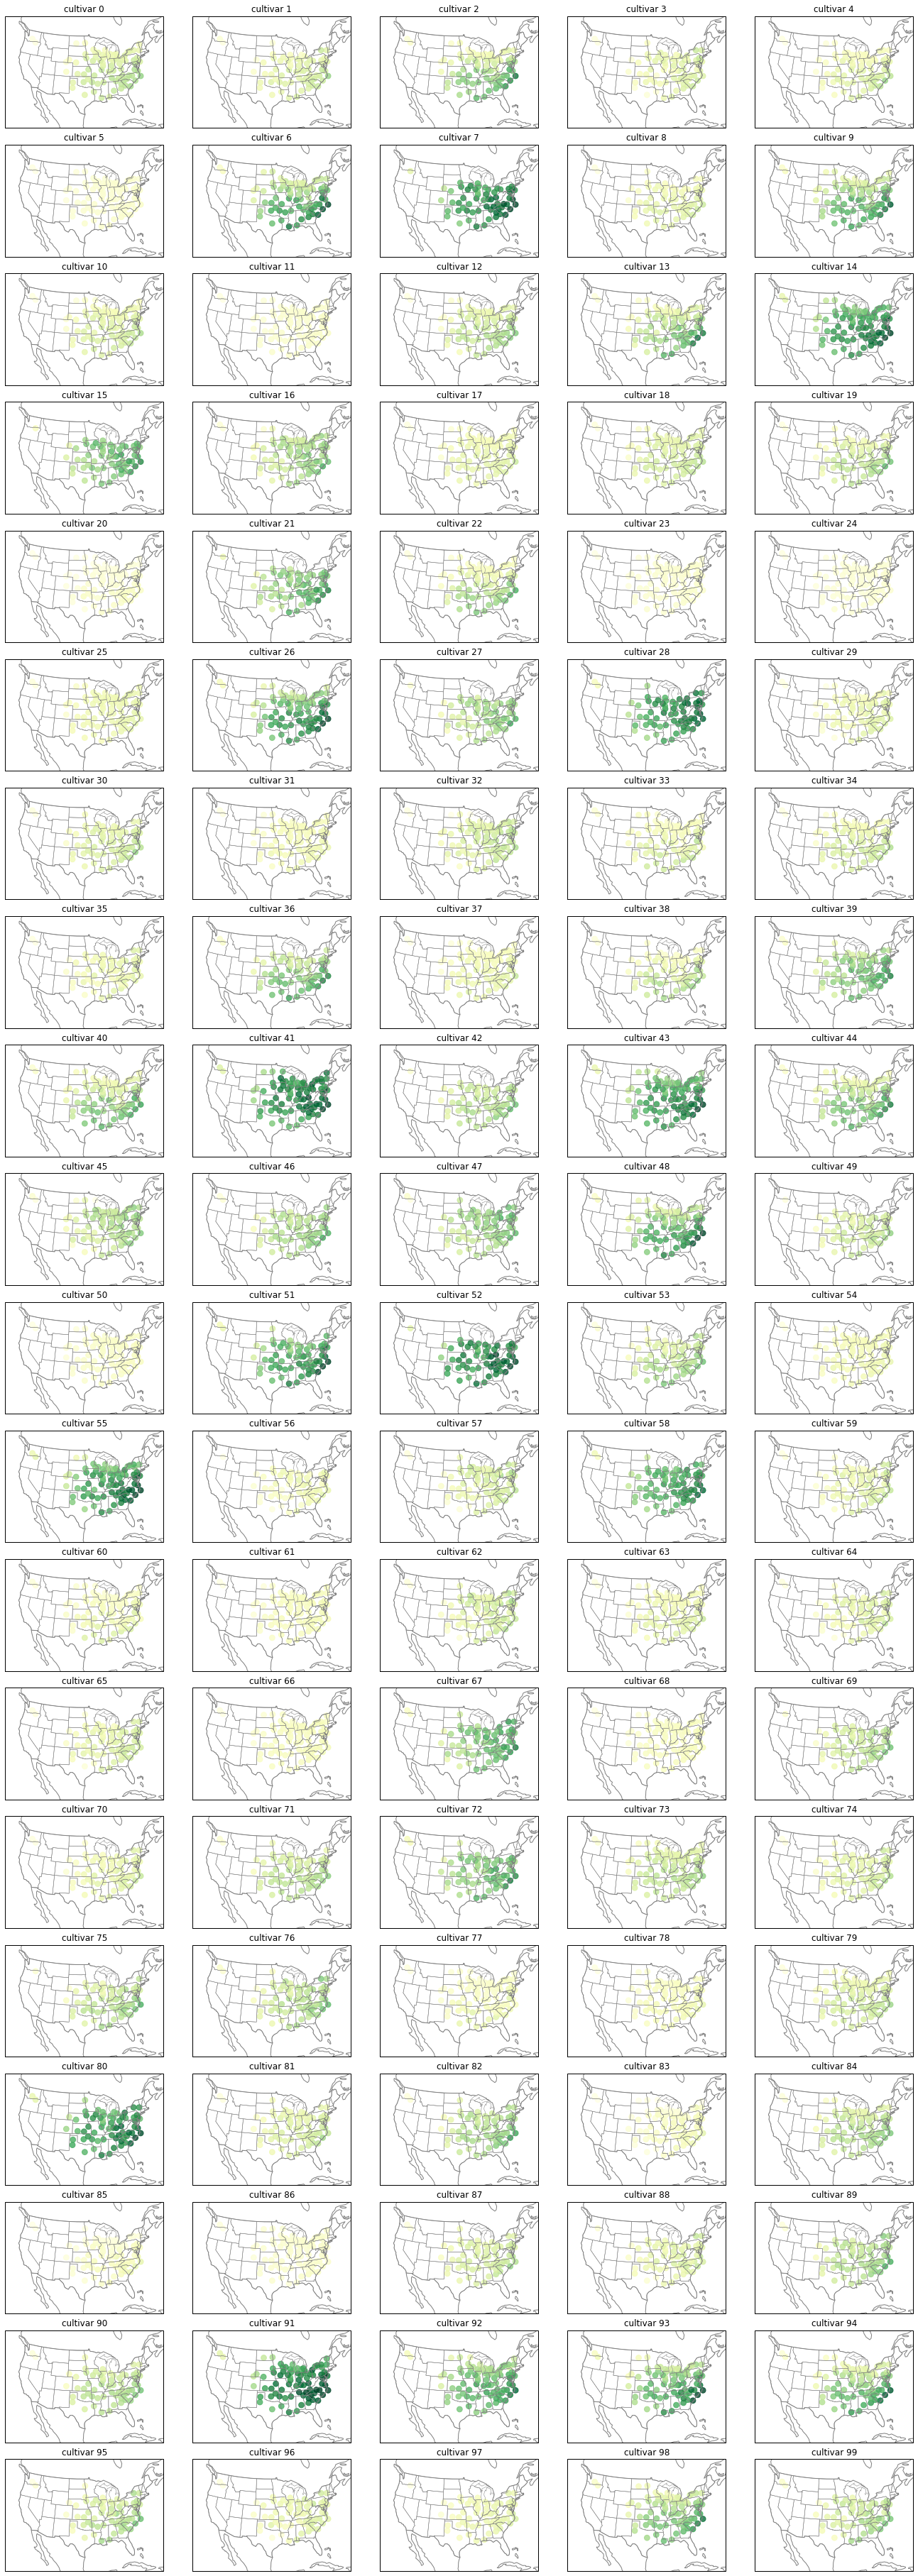

In [303]:
cvars = np.arange(0,100)
extent = [-123, -72, 19, 53]

fig = plt.figure(figsize=(20,50))

for cvar in cvars:
    ax = fig.add_subplot(20,5,cvar+1,
                         projection=ccrs.AlbersEqualArea(
                         central_latitude=39.5, central_longitude=-98.35))
    ax.set_extent([-123, -72, 19, 53])
    df_sub = df_matured[df_matured.cvar == cvar].groupby('site').mean()
    ax.scatter(df_sub.lon_x, df_sub.lat_x, transform=ccrs.PlateCarree(), 
               s=60, c=df_sub.dm_ear, cmap=YlGn_9.mpl_colormap, vmin=0, vmax=150, alpha=0.8)

    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set(title='cultivar ' + str(cvar))

fig.subplots_adjust(left=0.05, bottom=0, right=0.95, top=1, wspace=0.1, hspace=0.15)

#### 210326 notes
- Also observed that final yield is lower for most cultivars with erain corrected. This does not make sense to me since there should be less of a water stress and greater yield. Very strange.
- Unless this is showing something more artificial due to sims getting cut off more in the fixpd sims?

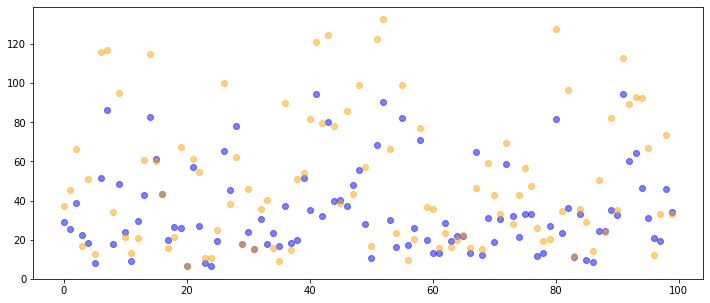

In [39]:
fig = plt.figure(figsize=(12,5))
plt.plot(df_sims_fix.groupby('cvar').mean().dm_ear, 'o', alpha=0.5, c='blue')
plt.plot(df_sims_opt.groupby('cvar').mean().dm_ear, 'o', alpha=0.5, c='orange')

#### 210326 notes
- Also noticed that site 723240 had really weird behavior. All sims in year 1963 'failed' as in they all took so long to finish running that all of them only got the header logged in the sims outputs before getting cut off.
- The simulations did eventually finish when I test-ran them individually, but took around 15 mins to finish, so I suspect they took even longer to run on the nodes, and is probably why they all got cut off.
- However, I couldn't really find any significant difference between the weather data for this site between year 1962 (which had mostly normal sim outputs) and year 1963.
- If I toggle erain back to 0 then that solves the problem, but I'm not sure why (because plants are water stressed so senescence is hastened? - this could be a mechanism in leaf.cpp), and also don't think that's the right way to go about.

In [2]:
wea_723240_1962 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/data/control/723240_1962.txt', '\t')
wea_723240_1963 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/data/control/723240_1963.txt', '\t')
wea_725200_1990 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/data/control/725200_1990.txt', '\t')

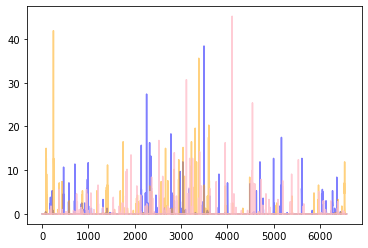

In [4]:
plt.plot(wea_723240_1962.precip, color='blue', alpha=0.5)
plt.plot(wea_723240_1963.precip, color='orange', alpha=0.5)
plt.plot(wea_725200_1990.precip, color='pink', alpha=0.8)

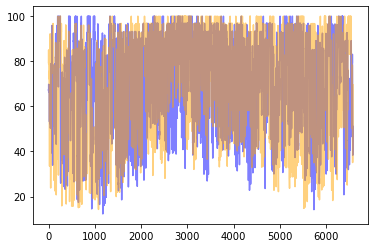

In [319]:
plt.plot(wea_723240_1962.rh, color='blue', alpha=0.5)
plt.plot(wea_723240_1963.rh, color='orange', alpha=0.5)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

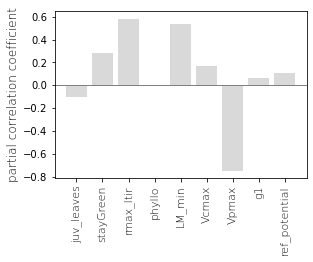

In [72]:
# setting up parameter values and ear biomass
df_sims_cvarmean = df_all.groupby(['cvar']).mean()

df_stats = pd.concat([df_params.iloc[:,:-1], # remove 'cvar' column
                      df_sims_cvarmean.dm_ear], # including mean ear biomass for each cultivar
                     axis=1) 

from partial_corr import partial_corr
output = partial_corr(df_stats)
params = list(df_params.columns[:-1]) # remove 'cvar' column
corrs = output[-1][:-1] # select final row in correlation matrix - correlation with ear biomass,
                        # and remove final correlation coefficient,
                        # which is the correlation coefficient with ear biomass itself = 1

# figure 
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.bar(params, corrs, alpha=1, color='#d9d9d9')
ax.set_ylabel('partial correlation coefficient', fontsize=12, weight='light')
#ax.set_title('wet soil')
ax.axhline(0, color='grey', lw=1)
fig.subplots_adjust(left=0.2, bottom=0.3)
plt.xticks(rotation=90, fontsize=11, weight='light')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

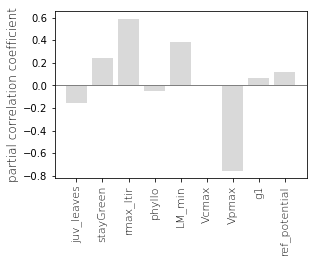

In [82]:
from pingouin import pcorr
pcc = df_stats.pcorr().iloc[:,-1][:-1]

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.bar(params, pcc, alpha=1, color='#d9d9d9')
ax.set_ylabel('partial correlation coefficient', fontsize=12, weight='light')
#ax.set_title('wet soil')
ax.axhline(0, color='grey', lw=1)
fig.subplots_adjust(left=0.2, bottom=0.3)
plt.xticks(rotation=90, fontsize=11, weight='light')


In [155]:
partial_corr(df_stats, x='ref_potential', y='dm_ear', 
             covar=['juv_leaves',
                    'stayGreen', 
                    'rmax_ltir',
                    'phyllo',
                    'LM_min',
                    'Vcmax',
                    'Vpmax',
                    'g1'])

n        r          CI95%       r2   adj_r2     p-val   BF10  \
pearson  100  0.12231  [-0.08, 0.31]  0.01496 -0.00535  0.225405  0.258   

            power  
pearson  0.229008

In [144]:
partial_corr(df_stats, x='stayGreen', y='dm_ear', 
             covar=['juv_leaves',
#                    'stayGreen', 
                    'rmax_ltir',
                    'phyllo',
                    'LM_min',
                    'Vcmax',
                    'Vpmax',
                    'g1',
                    'ref_potential'])

n         r         CI95%       r2    adj_r2     p-val   BF10  \
pearson  100  0.240956  [0.05, 0.42]  0.05806  0.038639  0.015737  2.213   

            power  
pearson  0.681328

In [140]:
df_stats.pcorr()

juv_leaves  stayGreen  rmax_ltir    phyllo    LM_min     Vcmax  \
juv_leaves       1.000000  -0.021586   0.176158 -0.036246  0.045461 -0.002001   
stayGreen       -0.021586   1.000000  -0.130436  0.150025 -0.139793 -0.026115   
rmax_ltir        0.176158  -0.130436   1.000000  0.114901 -0.220458  0.069050   
phyllo          -0.036246   0.150025   0.114901  1.000000  0.008361  0.026722   
LM_min           0.045461  -0.139793  -0.220458  0.008361  1.000000 -0.167687   
Vcmax           -0.002001  -0.026115   0.069050  0.026722 -0.167687  1.000000   
Vpmax           -0.078261   0.134311   0.565213 -0.123314  0.328123  0.070061   
g1               0.074193   0.008462   0.080933 -0.092623  0.176796 -0.042035   
ref_potential   -0.139700  -0.115433  -0.057220 -0.095853  0.064102  0.069340   
dm_ear          -0.157943   0.240956   0.589546 -0.051686  0.382156 -0.000691   

                  Vpmax        g1  ref_potential    dm_ear  
juv_leaves    -0.078261  0.074193      -0.139700 -0.157943  
stayGreen      0.134311  0.008462      -0.115433  0.240956  
rmax_ltir      0.565213  0.080933      -0.057220  0.589546  
phyllo        -0.123314 -0.092623      -0.095853 -0.051686  
LM_min         0.328123  0.176796       0.064102  0.382156  
Vcmax          0.070061 -0.042035       0.069340 -0.000691  
Vpmax          1.000000  0.023068      -0.109425 -0.751966  
g1             0.023068  1.000000      -0.212954  0.066552  
ref_potential -0.109425 -0.212954       1.000000  0.122310  
dm_ear        -0.751966  0.066552       0.122310  1.000000

In [131]:
from pingouin import partial_corr

corrs = []

for item in list(df_stats.columns[:-1]):
    corrs.append(partial_corr(df_stats, x=item, y='dm_ear').r[0])

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

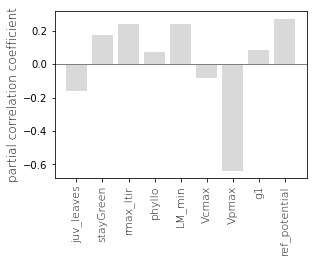

In [132]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.bar(params, corrs, alpha=1, color='#d9d9d9')
ax.set_ylabel('partial correlation coefficient', fontsize=12, weight='light')
#ax.set_title('wet soil')
ax.axhline(0, color='grey', lw=1)
fig.subplots_adjust(left=0.2, bottom=0.3)
plt.xticks(rotation=90, fontsize=11, weight='light')


/home/disk/eos8/ach315/anaconda3/envs/ideotype/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


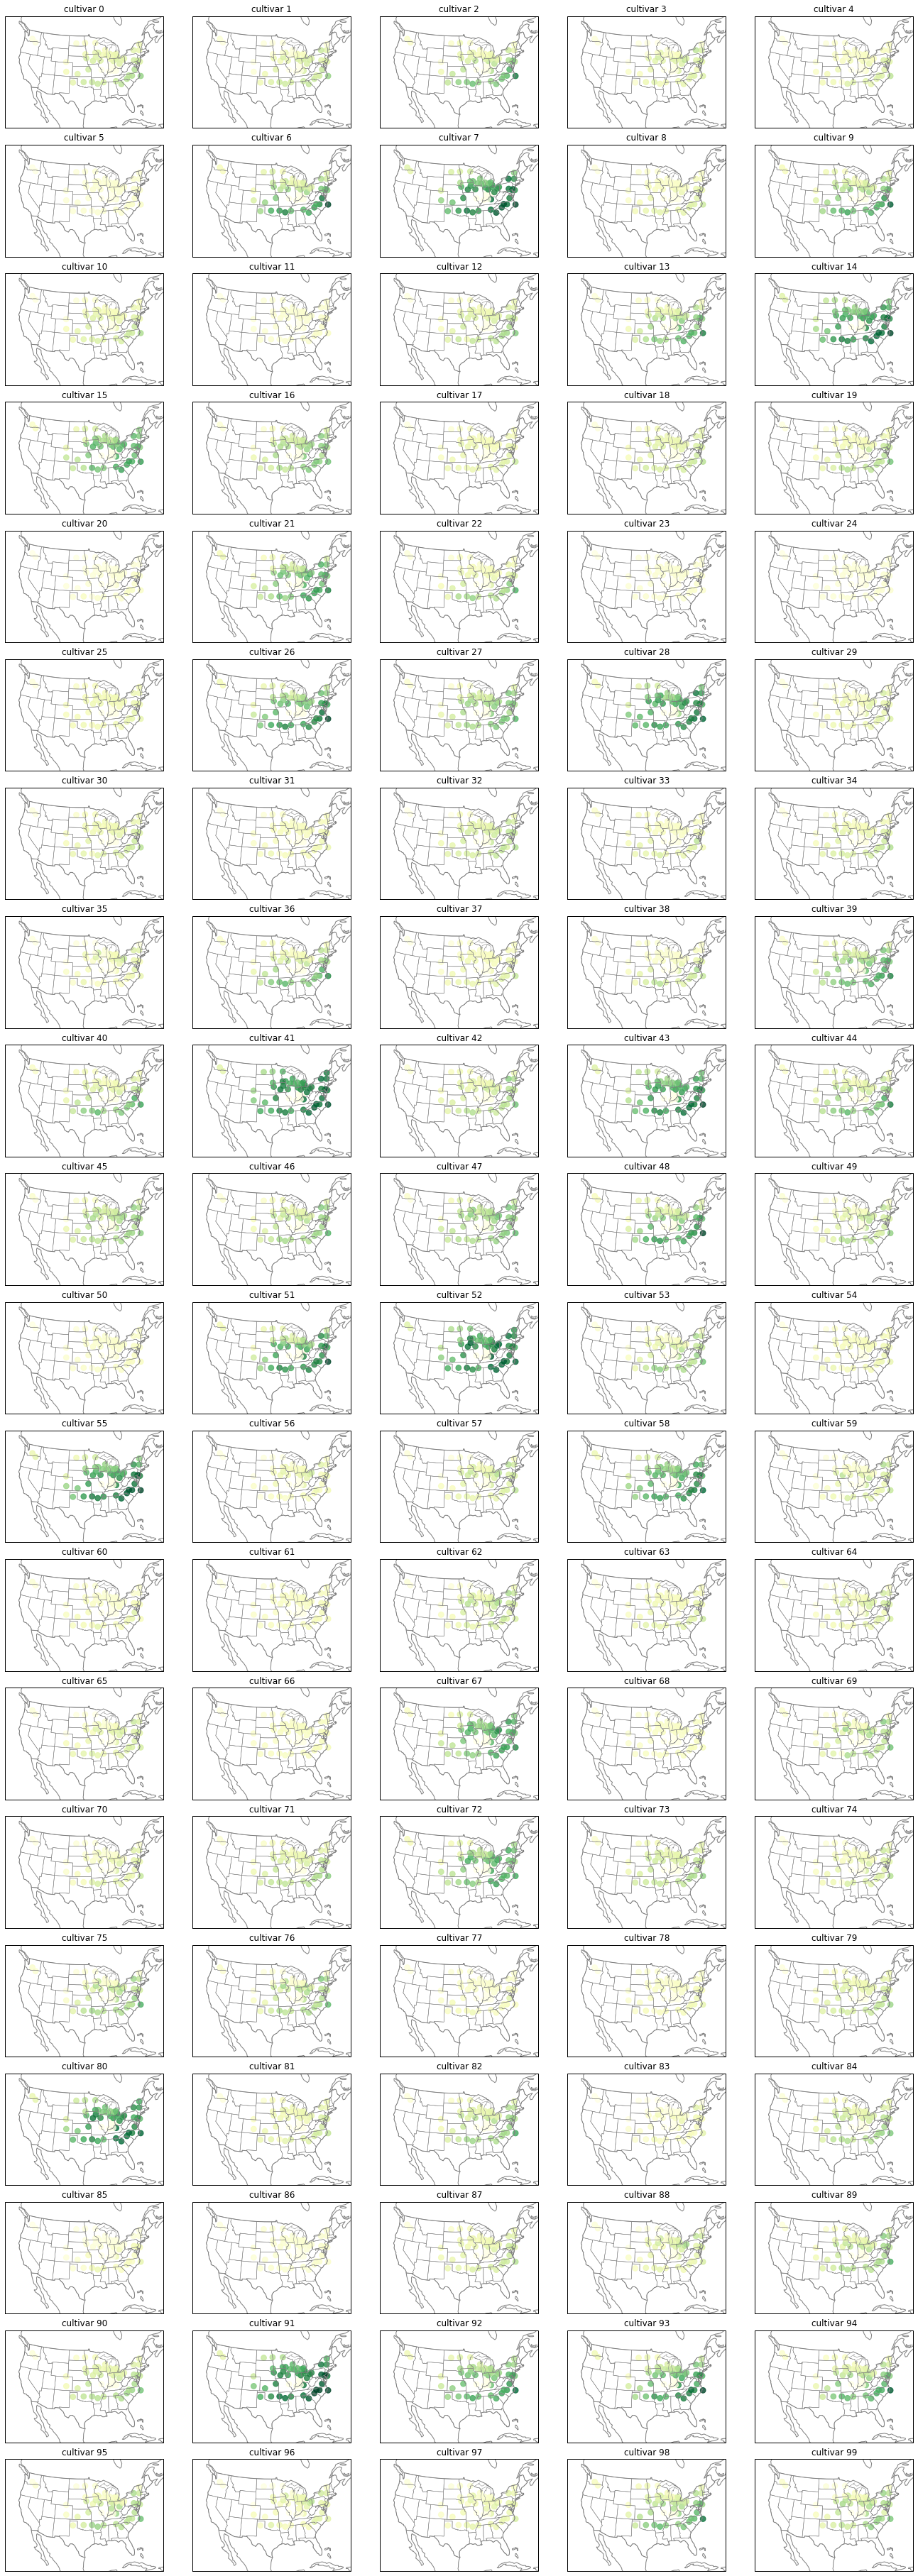

In [65]:
cvars = np.arange(0,100)
extent = [-123, -72, 19, 53]
sites = df_sites[df_sites.site.isin(df_sims_sitemean.index)]

fig = plt.figure(figsize=(20,50))

for cvar in cvars:
    ax = fig.add_subplot(20,5,cvar+1,
                         projection=ccrs.AlbersEqualArea(
                         central_latitude=39.5, central_longitude=-98.35))
    ax.set_extent([-123, -72, 19, 53])
    df_sub = df_sims[df_sims.cvar == cvar]
    ax.scatter(sites.lon, sites.lat, transform=ccrs.PlateCarree(), 
#               s=60, c=df_sub.dm_ear, cmap=YlGn_9.mpl_colormap, alpha=0.8)
               s=60, c=df_sub.dm_ear, cmap=YlGn_9.mpl_colormap, vmin=0, vmax=150, alpha=0.8)

    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set(title='cultivar ' + str(cvar))
#    cbar = fig.colorbar(mp, ax=ax, shrink=0.7)
fig.subplots_adjust(left=0.05, bottom=0, right=0.95, top=1, wspace=0.1, hspace=0.15)